In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#display first five observations of both data
train_data.head(5)
test_data.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [4]:
#display info of the data 
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9751 non-null object
i

In [5]:
#view description of the data
train_data.describe()
test_data.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.029200,0.004668,0.500900,58232.104800,1.486300,2.009100,5.319800
std,12.896921,0.000836,0.500024,17318.192722,0.499837,0.817242,5.019487
min,16.000000,0.003173,0.000000,16124.000000,1.000000,1.000000,0.000000
25%,27.000000,0.004000,0.000000,45575.250000,1.000000,1.000000,1.000000
50%,38.000000,0.004609,1.000000,58271.000000,1.000000,2.000000,4.000000
75%,49.000000,0.005175,1.000000,70438.750000,2.000000,3.000000,8.000000
max,60.000000,0.007049,1.000000,99916.000000,2.000000,3.000000,22.000000


C:\Users\Israel Ilori\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


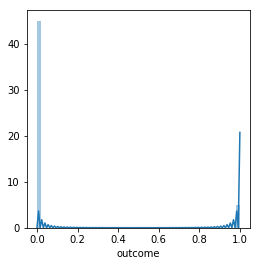

In [6]:
#display distribution plot for the outcome feature
fig, ax = plt.subplots(figsize=(4, 4))
sns.distplot(train_data.outcome, ax=ax)

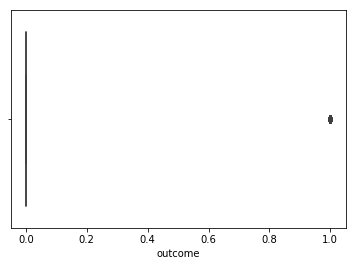

In [7]:
#using boxplot check for outliers
import seaborn as sns
sns.boxplot(x='outcome', data = train_data)

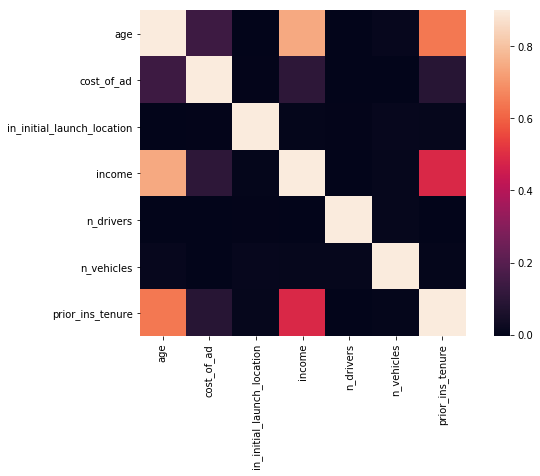

In [8]:
#correlation between features in the data
a = train_data.iloc[:,:9]
corr_matrix = a.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

In [9]:
#Feature encoding for categorical values in the dataset
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train_data['gender'] = number.fit_transform(train_data['gender'].astype('str'))
test_data['gender'] = number.fit_transform(test_data['gender'].astype('str'))
train_data['device_type'] = number.fit_transform(train_data['device_type'].astype('str'))
test_data['device_type'] = number.fit_transform(test_data['device_type'].astype('str'))


In [10]:
#display counts for both classes
train_data['outcome'].value_counts()

0    9018
1     982
Name: outcome, dtype: int64

In [11]:
from sklearn.utils import resample

#Separate majority and minority classes
train_majority = train_data[train_data.outcome==0]
train_minority = train_data[train_data.outcome==1]

#assign variable count of the majority class to be used in the method
majority_count = len(train_data[train_data.outcome==0])

#Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     #sample with replacement
                                 n_samples=majority_count,    #to match majority class
                                 random_state=123) # reproducible results
 
#Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])
 
#Display new counts for both classes
train_upsampled.outcome.value_counts()

1    9018
0    9018
Name: outcome, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

#Separate input features (X) and target variable (y)
y = train_upsampled.outcome
X = train_upsampled.drop('outcome', axis=1)
test = test_data.iloc[:,:].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [13]:
#Train model
#Instantiate model and fit 
log_reg = LogisticRegression().fit(X_train, y_train) #serves as base model
rand_forest = RandomForestClassifier().fit(X_train, y_train) #serves as second model 

#Predict on train set
y_pred = rand_forest.predict(X_test)

#display the classes for which model is predicting
print(np.unique(y_pred))


#display performance metrics
print('The Accuracy score is: ',accuracy_score(y_test, y_pred))
print('The F1_score score is: ',f1_score(y_test, y_pred))
print('The AUC score is: ',roc_auc_score(y_test, y_pred))

[0 1]
The Accuracy score is:  0.9732027351690999
The F1_score score is:  0.9740932642487047
The AUC score is:  0.9729981378026071


In [14]:
#Run prediction on the test set
y_pred2 = rand_forest.predict(test)

#Display the first five predicted values
y_pred2[:5]

array([0, 0, 0, 0, 0], dtype=int64)